In [51]:
%matplotlib inline

In [52]:
import pandas as pd
from ipywidgets import widgets

In [53]:
df_codis_info = pd.read_csv("data/codis_info.csv")

### RGB Color 확인(전체)

In [85]:
df_codis_info

,name,color1_ratio,color1_R,color1_G,color1_B,color2_ratio,color2_R,color2_G,color2_B,color3_ratio,color3_R,color3_G,color3_B
0,395456,0.552068,19.347484,74.598975,101.897819,0.333003,118.263815,136.837699,161.962385,0.114928,225.595962,231.418573,234.083715
1,395457,0.366889,235.853713,237.499254,243.467044,0.354360,9.325768,49.415161,111.804539,0.278750,111.723454,129.031600,134.944259
2,395458,0.478984,29.888510,32.705910,34.252413,0.327304,91.135019,114.749914,136.079119,0.193712,242.427326,243.395930,245.615988
3,395459,0.454407,251.017751,250.918482,250.725811,0.333933,39.257884,44.032468,34.898356,0.211660,98.930366,98.529972,67.635901
4,395460,0.438566,125.796515,27.693648,34.216343,0.397761,49.884847,48.377934,50.190314,0.163673,228.921261,229.310303,230.060820
5,395461,0.564824,228.986021,183.386645,94.263401,0.271522,229.246604,229.005037,227.352084,0.163655,27.729644,28.168672,29.440800
6,395463,0.410442,172.251756,164.349618,141.826596,0.335554,235.215158,233.183658,227.844024,0.254004,102.080958,105.146028,82.766456
7,395464,0.417990,254.391013,254.441782,254.257964,0.398211,29.463134,27.196294,31.241458,0.183799,213.243046,212.957437,212.061156
8,395465,0.411705,150.240283,155.176877,158.094862,0.325783,233.415279,234.233555,232.380933,0.262512,44.615504,60.897674,76.517829
9,395468,0.584375,34.520261,45.423648,48.089008,0.224167,181.936533,168.100310,117.280495,0.191458,223.197822,221.737568,227.980036


In [203]:
def rgb2hsv(r, g, b):
    
    r, g, b = r/255.0, g/255.0, b/255.0
    mx = max(r, g, b)
    mn = min(r, g, b)
    df = mx-mn
    if mx == mn:
        h = 0
        #print('1 ', h)
    elif mx == r:
        h = (60 * ((g-b)/df) + 360) % 360
        #print('2 ', h)
    elif mx == g:
        h = (60 * ((b-r)/df) + 120) % 360
        #print('3 ', h)
    elif mx == b:
        h = (60 * ((r-g)/df) + 240) % 360
        #print('4 ', h)
        
    if mx == 0:
        s = 0
    else:
        s = df/mx
    v = mx
    return np.array([h, s, v])

 

In [217]:
hsvarr = []
for num in range(1, 4):
    print(num)
    col1 = 'color{}_R'.format(num)
    col2 = 'color{}_G'.format(num)
    col3 = 'color{}_B'.format(num)
    
    color1 = df_codis_info.filter(items=[col1, col2, col3]).values
    hsv_ls = []
    for i in range(len(color1)):
        row = (color1[i]) 
        hsv_ls.append(rgb2hsv(row[0], row[1], row[2]))

    hsv1 = np.vstack(hsv_ls)
    hsvarr.append(hsv1)

1
2
3


In [54]:
ar_codis_RGB = df_codis_info.filter(regex="[RGB]").values

In [55]:
color_RGB = ar_codis_RGB.reshape(1116*3, 3) / 256

In [56]:
def plot_color(azim):
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(111, projection='3d');
    ax.scatter(color_RGB[:,0], color_RGB[:,1], color_RGB[:,2], c=color_RGB, s=20, cmap=plt.cm.jet, alpha=1)
    ax.view_init(20, azim)

In [57]:
widgets.interact(plot_color, azim=widgets.IntSlider(min=0,max=180,step=10,value=0));

interactive(children=(IntSlider(value=0, description='azim', max=180, step=10), Output()), _dom_classes=('widg…

### HSV Color 확인(전체)

In [60]:
ar_codis_HSV = df_codis_info.filter(regex="[HSV]").values.reshape(1116*3, 3)

ValueError: cannot reshape array of size 0 into shape (3348,3)

interactive(children=(IntSlider(value=0, description='azim', max=180, step=10), Output()), _dom_classes=('widg…

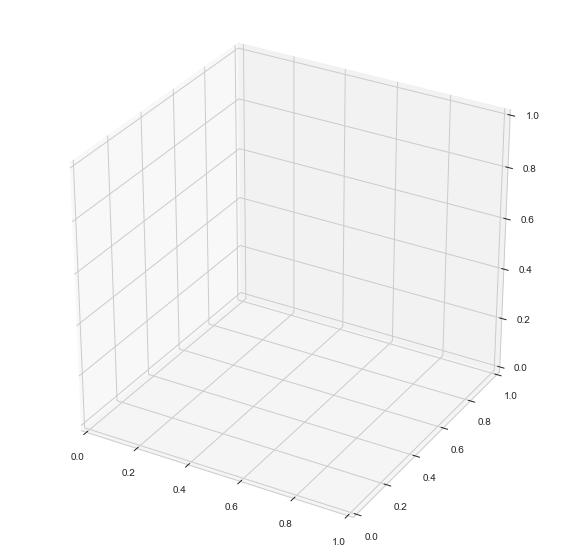

In [59]:
def plot_color_HSV(azim):
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(111, projection='3d');
    ax.scatter(ar_codis_HSV[:,0], ar_codis_HSV[:,1], ar_codis_HSV[:,2], c=color_RGB, s=20, cmap=plt.cm.jet, alpha=1)
    ax.view_init(20, azim)
widgets.interact(plot_color_HSV, azim=widgets.IntSlider(min=0,max=180,step=10,value=0));

- 무채색 계통이 많이 검출된다.

### Main Color1 (RGB, HSV)

In [61]:
ar_color1_RGB = df_codis_info.filter(regex="color1_[RGB]").values /256

In [62]:
def plot_color1(azim):
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(111, projection='3d');
    ax.scatter(ar_color1_RGB[:,0], ar_color1_RGB[:,1], ar_color1_RGB[:,2], c=ar_color1_RGB, s=20, cmap=plt.cm.jet, alpha=1)
    ax.view_init(20, azim)
    
widgets.interact(plot_color1, azim=widgets.IntSlider(min=0,max=180,step=10,value=0));

interactive(children=(IntSlider(value=0, description='azim', max=180, step=10), Output()), _dom_classes=('widg…

In [63]:
ar_color1_HSV = df_codis_info.filter(regex="color1_[HSV]").values

interactive(children=(IntSlider(value=0, description='azim', max=180, step=10), Output()), _dom_classes=('widg…

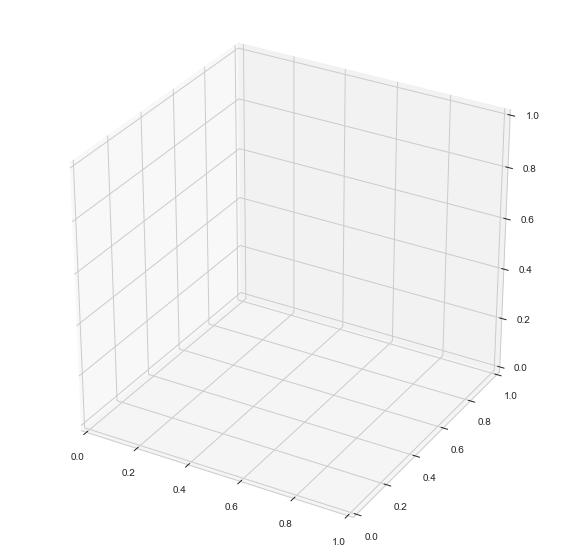

In [64]:
def plot_color1_HSV(azim):
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(111, projection='3d');
    ax.scatter(ar_color1_HSV[:,0], ar_color1_HSV[:,1], ar_color1_HSV[:,2], c=ar_color1_RGB, s=20, cmap=plt.cm.jet, alpha=1)
    ax.view_init(20, azim)
    
widgets.interact(plot_color1_HSV, azim=widgets.IntSlider(min=0,max=180,step=10,value=0));

- 검정과 흰색에 집중되어 있다.
- 중간이 거의 없다.

### Main Color2 (RGB, HSV)

In [65]:
ar_color2_RGB = df_codis_info.filter(regex="color2_[RGB]").values /256

In [66]:
def plot_color2(azim):
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(111, projection='3d');
    ax.scatter(ar_color2_RGB[:,0], ar_color2_RGB[:,1], ar_color2_RGB[:,2], c=ar_color2_RGB, s=20, cmap=plt.cm.jet, alpha=1)
    ax.view_init(20, azim)
    
widgets.interact(plot_color2, azim=widgets.IntSlider(min=0,max=180,step=10,value=0));

interactive(children=(IntSlider(value=0, description='azim', max=180, step=10), Output()), _dom_classes=('widg…

In [67]:
ar_color2_HSV = df_codis_info.filter(regex="color2_[HSV]").values

interactive(children=(IntSlider(value=0, description='azim', max=180, step=10), Output()), _dom_classes=('widg…

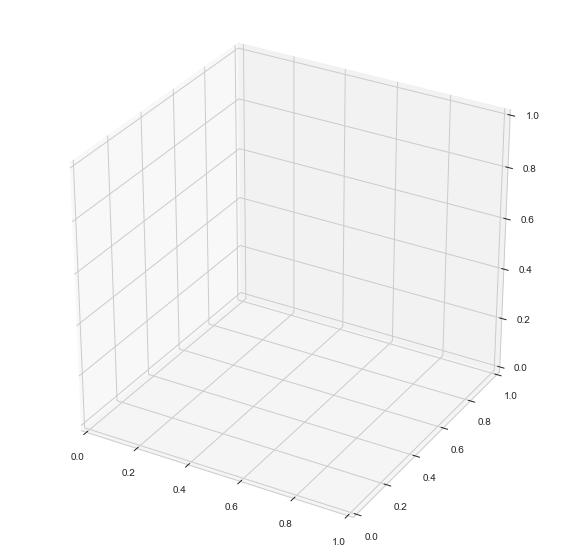

In [68]:
def plot_color2_HSV(azim):
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(111, projection='3d');
    ax.scatter(ar_color2_HSV[:,0], ar_color2_HSV[:,1], ar_color2_HSV[:,2], c=ar_color2_RGB, s=20, cmap=plt.cm.jet, alpha=1)
    ax.view_init(20, azim)
    
widgets.interact(plot_color2_HSV, azim=widgets.IntSlider(min=0,max=180,step=10,value=0));

### Main Color3 (RGB, HSV)

In [69]:
ar_color3_RGB = df_codis_info.filter(regex="color3_[RGB]").values /256

In [70]:
def plot_color3(azim):
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(111, projection='3d');
    ax.scatter(ar_color2_RGB[:,0], ar_color3_RGB[:,1], ar_color3_RGB[:,2], c=ar_color3_RGB, s=20, cmap=plt.cm.jet, alpha=1)
    ax.view_init(20, azim)
    
widgets.interact(plot_color3, azim=widgets.IntSlider(min=0,max=180,step=10,value=0));

interactive(children=(IntSlider(value=0, description='azim', max=180, step=10), Output()), _dom_classes=('widg…

In [71]:
ar_color3_HSV = df_codis_info.filter(regex="color3_[HSV]").values

interactive(children=(IntSlider(value=0, description='azim', max=180, step=10), Output()), _dom_classes=('widg…

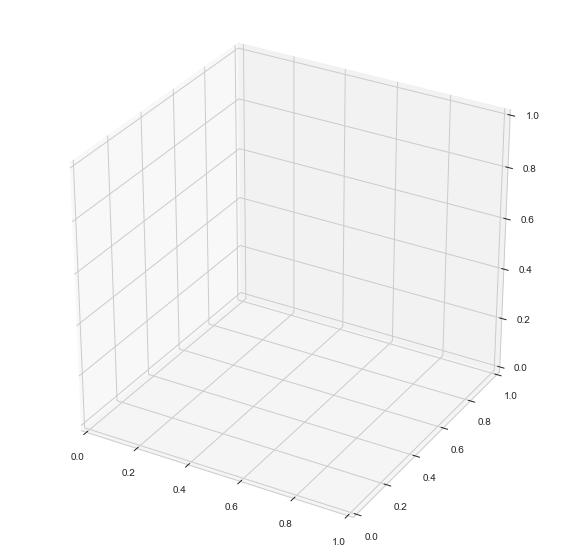

In [72]:
def plot_color3_HSV(azim):
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(111, projection='3d');
    ax.scatter(ar_color3_HSV[:,0], ar_color3_HSV[:,1], ar_color3_HSV[:,2], c=ar_color3_RGB, s=20, cmap=plt.cm.jet, alpha=1)
    ax.view_init(20, azim)
    
widgets.interact(plot_color3_HSV, azim=widgets.IntSlider(min=0,max=180,step=10,value=0));

In [73]:
df_codis_info.tail()

,name,color1_ratio,color1_R,color1_G,color1_B,color2_ratio,color2_R,color2_G,color2_B,color3_ratio,color3_R,color3_G,color3_B
1111,397005,0.415858,234.213846,233.892050,238.172338,0.406404,21.023577,24.031536,28.714972,0.177737,62.144277,79.258053,111.384510
1112,397006,0.630105,23.764715,24.239371,24.751244,0.344838,242.026831,241.340823,245.811664,0.025057,125.453157,125.100815,126.039715
1113,397007,0.633673,27.650401,26.307009,27.053562,0.239583,75.057487,94.037051,129.622040,0.126744,206.097693,210.852559,216.266042
1114,397008,0.635646,33.647317,34.603687,35.937386,0.295892,198.603922,7.386471,13.563333,0.068461,233.768644,231.126271,231.515254
1115,397009,0.873307,28.293539,29.345128,33.002562,0.095912,240.303279,240.676545,241.539723,0.030781,102.096267,103.807466,105.422397


### 전체 분포 확인 (RGB)

In [74]:
from sklearn.decomposition import PCA

In [75]:
ar_codis_RGB = df_codis_info.filter(regex="[RGB]").values
clt = PCA(3)
pca_RGB = clt.fit_transform(ar_codis_RGB)

In [76]:
from mpl_toolkits.mplot3d import Axes3D

def plot_pca(azim):
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(111, projection='3d');
    ax.scatter(pca_RGB[:,0], pca_RGB[:,1], pca_RGB[:,2], c="b", s=20, cmap=plt.cm.jet, alpha=1)
    ax.view_init(20, azim)

In [77]:
widgets.interact(plot_pca, azim=widgets.IntSlider(min=0,max=180,step=10,value=0));

interactive(children=(IntSlider(value=0, description='azim', max=180, step=10), Output()), _dom_classes=('widg…

### 전체 분포 확인 (HSV)

In [78]:
ar_codis_HSV = df_codis_info.filter(regex="[HSV]").values
clt = PCA(3)
pca_HSV = clt.fit_transform(ar_codis_HSV)

ValueError: Found array with 0 feature(s) (shape=(1116, 0)) while a minimum of 1 is required.

In [79]:
pca_HSV[:,2]

NameError: name 'pca_HSV' is not defined

interactive(children=(IntSlider(value=0, description='azim', max=180, step=10), Output()), _dom_classes=('widg…

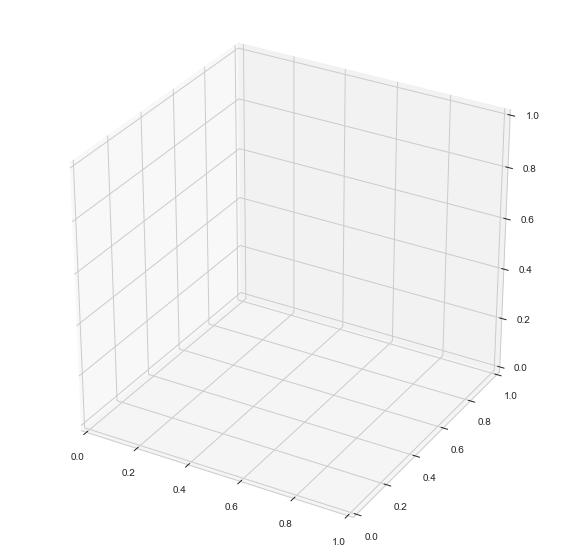

In [80]:
def plot_pca_HSV(azim):
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(111, projection='3d');
    ax.scatter(pca_HSV[:,0], pca_HSV[:,1], pca_HSV[:,2], s=20, cmap=plt.cm.jet, alpha=1)
    ax.view_init(20, azim)
    
widgets.interact(plot_pca_HSV, azim=widgets.IntSlider(min=0,max=180,step=10,value=0));

In [81]:
ar_codis_HSV

array([], shape=(1116, 0), dtype=float64)

In [82]:
 df_codis_info.filter(regex="color._H")

""
0
1
2
3
4
5
6
7
8
9
